<a href="https://colab.research.google.com/github/rio1004666/Colab/blob/main/Ch2.%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D/8_MNIST%EC%88%AB%EC%9E%90%EC%9D%B4%EB%AF%B8%EC%A7%80%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
"""
날짜: 2021/10/19
이름: 강병화
내용: MNIST 숫자이미지 실습하기 
"""
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, metrics
from sklearn.model_selection import train_test_split


In [ ]:
df_mnist_train_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/file/mnist_train.csv')
df_mnist_test_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/file/mnist_test.csv')

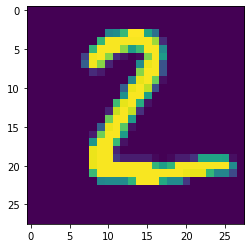

In [ ]:
# 픽셀 데이터 이미지 출력 

img_list = df_mnist_test_data.iloc[row,1:].tolist() # 데이터프레임의 슬라이싱 문법 0은 첫번째 행 1:은 두번째 열부터 마지막까지 컬럼
img = np.reshape(img_list,[28,28])
plt.imshow(img)




In [ ]:
# 학습데이터
mnist_train_data = df_mnist_train_data.iloc[:,1:] / 255 # 학습데이터가 크면 학습성능이 저하되므로 0~1사이 실수로 정규화한다..
mnist_train_label = df_mnist_train_data.iloc[:,0]
print(mnist_train_data.shape)
mnist_test_data = df_mnist_test_data.iloc[:,1:] / 255 # 테스트 데이터 
mnist_test_label = df_mnist_test_data.iloc[:,0]
print(mnist_test_data.shape)



(60000, 784)
(10000, 784)


In [ ]:
model = svm.SVC()
model.fit(mnist_train_data,mnist_train_label)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
# 테스트하기 
result = model.predict(mnist_test_data)
result

array([7, 2, 1, ..., 4, 5, 6])

In [ ]:
# 성능평가
score = metrics.accuracy_score(result, mnist_test_label)
score

In [ ]:
# 검증
row = 1
count = 0
for pro_img in img_list:
  answer = model.predict(mnist_test_data.iloc[[row],:])
  if pro_img == answer:
      count += 1
  row += 1 
print(count)